In [24]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [5]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [6]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just SHH group

In [7]:
shh_list = set()

for column in data.columns:
    if "SHH" in column: 
        shh_list = shh_list.union(set(data[column].replace({"":None}).dropna()))   

print(shh_list)

{'BBX', 'SMO', 'ATOH1', 'SOX13', 'INSM1', 'BCOR', 'CEBPA', 'YAP1', 'TCF12', 'DMRTA1', 'TGFBR1', 'LDB1', 'PDLI3', 'PCNT', 'SUFU', 'SOX2', 'PBX1', 'RARB', 'NCOR2', 'ZIC4', 'PTCH1', 'POU3F3', 'NFATC1', 'ZIC1', 'NHLH1', 'GLI2'}


# Creating a Network starting from All Omnipath interactions

In [8]:
shh_net = Network(shh_list, resources = omnipath)

Error: node SOX13 is not present in the resources database
Error: node DMRTA1 is not present in the resources database
Error: node PDLI3 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node NHLH1 is not present in the resources database


Adding the node that were not found manually: PDLI3 --> PDLIM3, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
shh_net.add_node("PDLIM3")

Error: node PDLIM3 is not present in the resources database


In [10]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,BBX,Q8WY36,NaN
1,SMO,Q99835,NaN
2,ATOH1,Q92858,NaN
3,INSM1,Q01101,NaN
4,BCOR,Q6W2J9,NaN
5,CEBPA,P49715,NaN
6,YAP1,P46937,NaN
7,TCF12,Q99081,NaN
8,TGFBR1,P36897,NaN
9,LDB1,Q86U70,NaN


In [11]:
shh_net.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

In [12]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,BBX,Q8WY36,NaN
1,SMO,Q99835,NaN
2,ATOH1,Q92858,NaN
3,INSM1,Q01101,NaN
4,BCOR,Q6W2J9,NaN
...,...,...,...
87,PPARG,P37231,NaN
88,RXRG,P48443,NaN
89,RXRA,P19793,NaN
90,ESR1,P03372,NaN


In [13]:
shh_net.edges

,source,target,Type,Effect,References
0,Q99835,P12931,None,stimulation,SIGNOR:18455992
1,P12931,O60674,None,stimulation,KEA:17570479;ProtMapper:17158356
2,O60674,Q92858,None,stimulation,SIGNOR:29168692;iPTMnet:29168692
3,Q99835,Q9UMX1,None,bimodal,ACSN:17641202;ACSN:17688959;ACSN:18820483;ACSN...
4,Q13635,Q99835,None,bimodal,BioGRID:9811851;CancerCellMap:9811851;HPMR:168...
...,...,...,...,...,...
266,P03372,COMPLEX:P27986_P42336,None,stimulation,SIGNOR:16169518
267,P03372,P27986,None,stimulation,BioGRID:11689445;HPRD:11689445;InnateDB:110290...
268,P19793,P37231,None,stimulation,BioGRID:10854698;BioGRID:10882139;BioGRID:1259...
269,P03372,P37231,None,stimulation,SignaLink3:16144913;SignaLink3:23331499


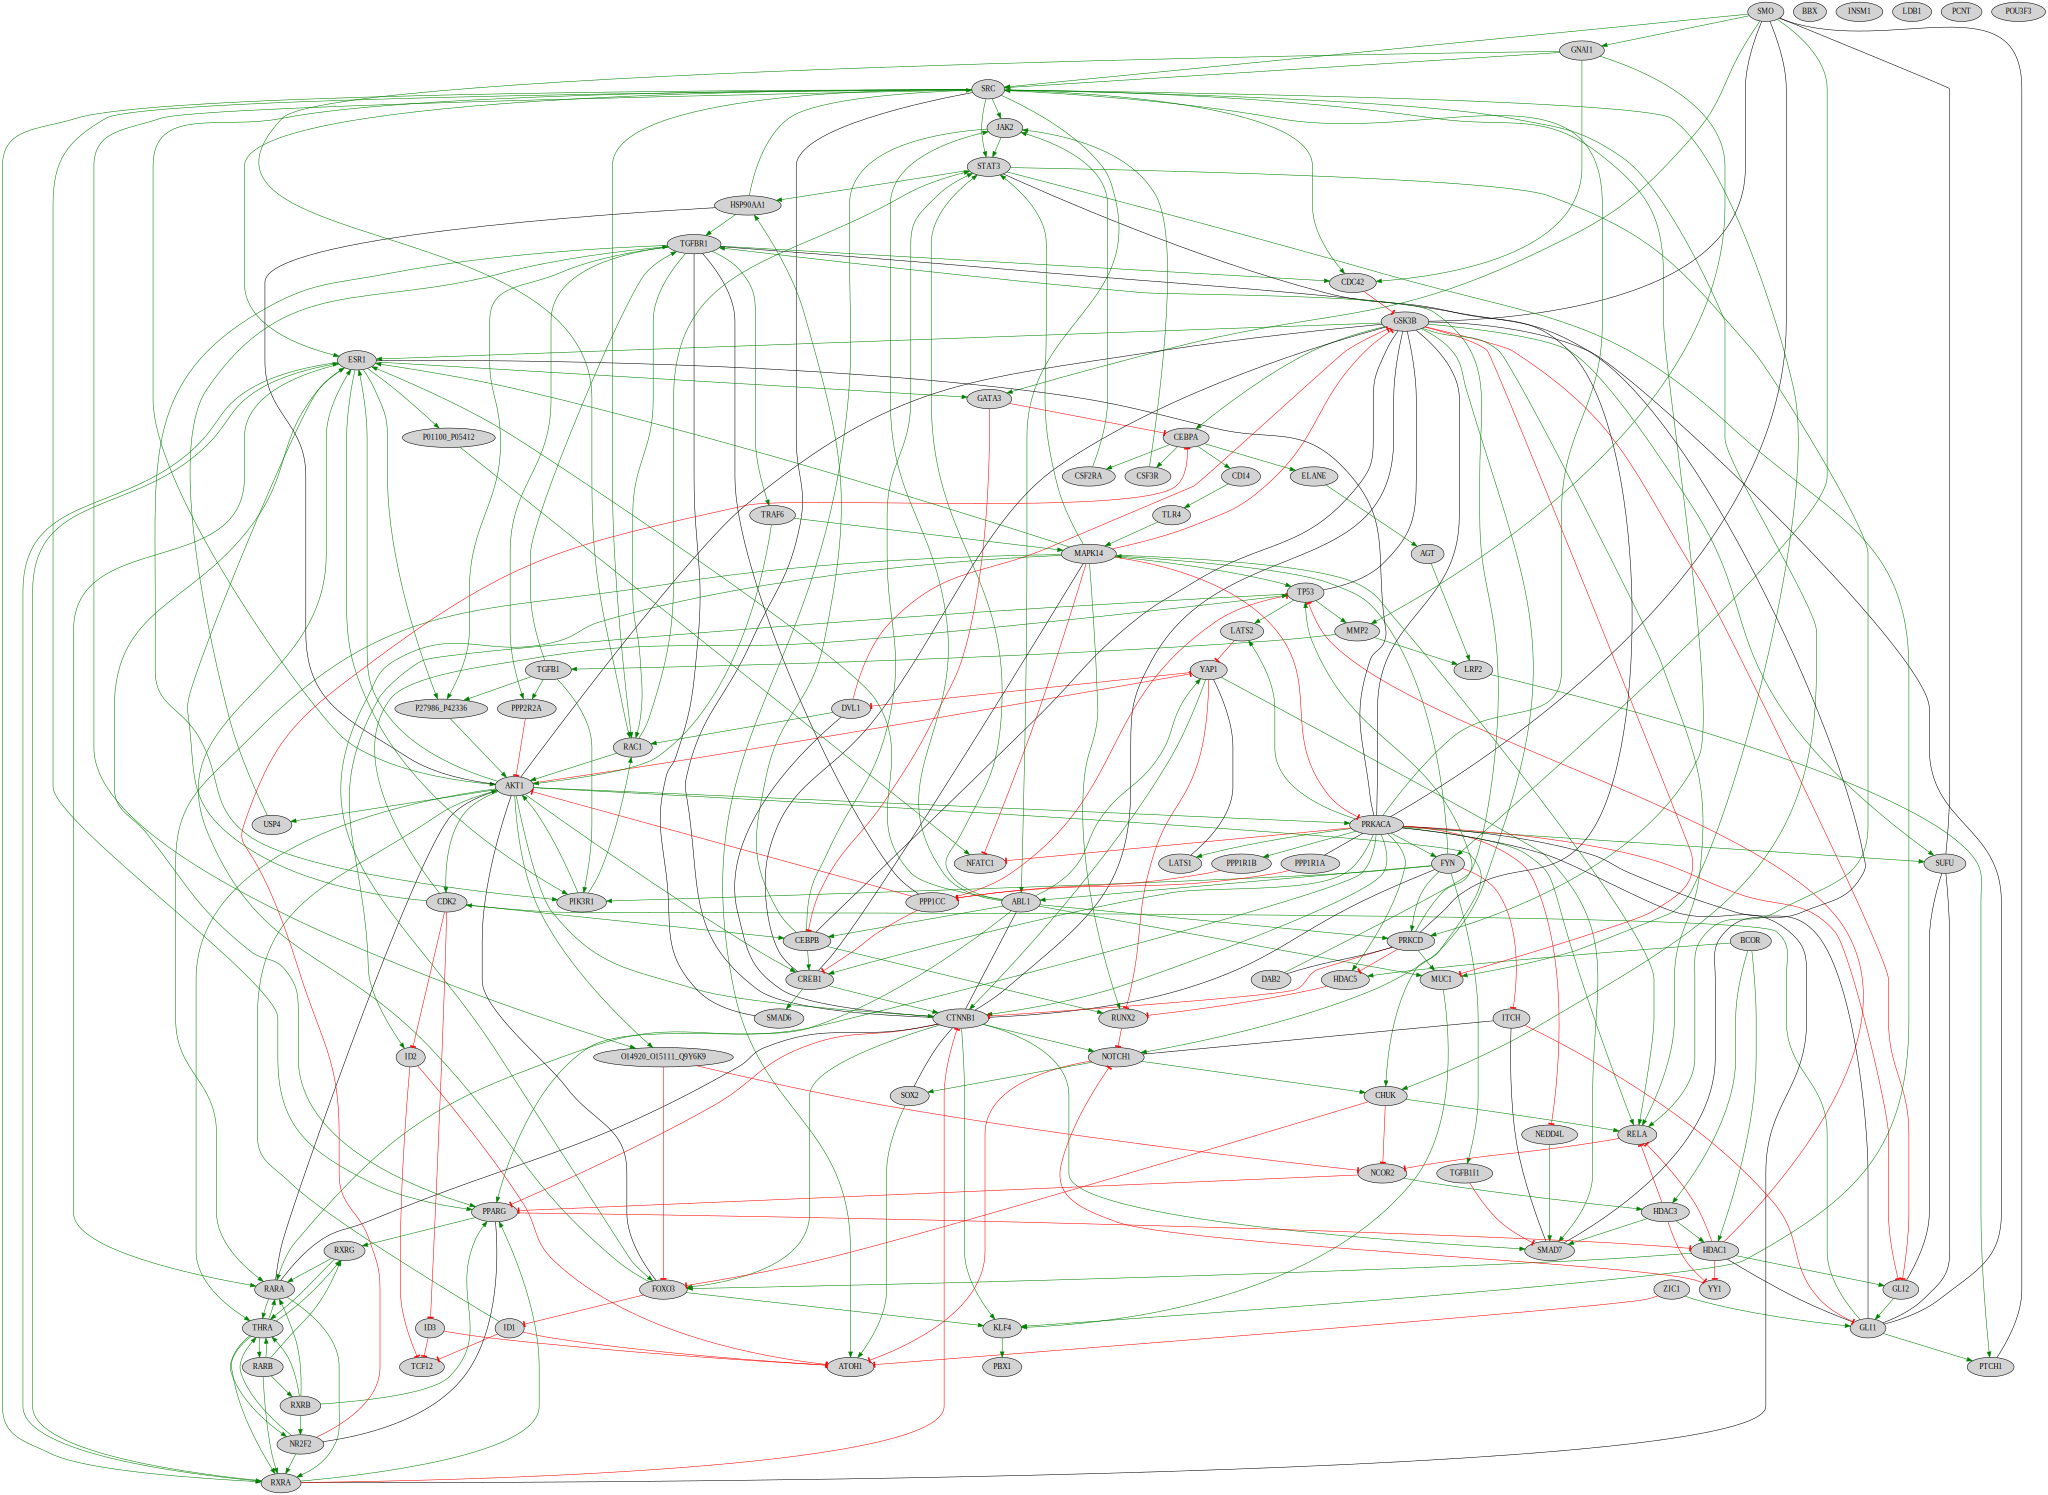

In [15]:
shh_visualizer = NetworkVisualizer(shh_net,color_by='effect')
output = figures_folder + "SHH/SHH_all_omnipath"
shh_visualizer.render(output_file=output)

# Exporting Network in sif file

In [21]:
from neko._outputs.exports import Exports

In [16]:
shh_net.remove_node("BBX")

In [17]:
shh_net.remove_node("INSM1")

In [18]:
shh_net.remove_node("LDB1")

In [19]:
shh_net.remove_node("POU3F3")

In [22]:
export = Exports(shh_net)

In [23]:
export.export_sif(sif_output + "SHH_all_omnipath.sif")